# BANA-212 Final Project Analysis Notebook

**Student:** Berry

**Date:** December 6, 2025

**Course:** BANA-212

**Purpose:** This notebook conducts a complete end-to-end analysis of Reddit sentiment data and stock market performance for TSLA, AAPL, MSFT, and SPY from 2022-2025. The analysis includes exploratory data analysis, feature engineering, regression modeling (predicting next-day returns), and classification modeling (predicting price direction).

## 1. Imports & Configuration

In [1]:
# Standard libraries
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import (
    r2_score, mean_absolute_error, mean_squared_error,
    accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc
)

# Project Configuration
BASE_DIR = "/Users/BerryMonsturr/Desktop/BANA-212-Final-Project"
DATA_FILE = os.path.join(BASE_DIR, "merged_final_dataset.csv")

# Create output directories
os.makedirs(os.path.join(BASE_DIR, "figures"), exist_ok=True)
os.makedirs(os.path.join(BASE_DIR, "model_outputs"), exist_ok=True)
os.makedirs(os.path.join(BASE_DIR, "eda_outputs"), exist_ok=True)

print("✓ All imports successful")
print(f"✓ Base directory: {BASE_DIR}")
print(f"✓ Data file: {DATA_FILE}")

✓ All imports successful
✓ Base directory: /Users/BerryMonsturr/Desktop/BANA-212-Final-Project
✓ Data file: /Users/BerryMonsturr/Desktop/BANA-212-Final-Project/merged_final_dataset.csv


## 2. Load Dataset

In [2]:
# Load the merged dataset
df = pd.read_csv(DATA_FILE)
df['Date'] = pd.to_datetime(df['Date'])

print("Dataset Shape:", df.shape)
print("\nColumns:")
print(df.columns.tolist())
print("\nData Types:")
print(df.dtypes)
print("\nFirst 5 rows:")
display(df.head())
print("\nLast 5 rows:")
display(df.tail())

Dataset Shape: (3848, 25)

Columns:
['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits', 'Symbol', 'Capital Gains', 'mean_sentiment', 'total_score', 'total_comments', 'Return_0D', 'Return_1D', 'Direction', 'post_count', 'has_reddit_data', 'engagement', 'abs_sentiment', 'sentiment_strength', 'sentiment_z', 'symbol_id', 'rolling_mean_5d', 'rolling_vol_5d']

Data Types:
Date                  datetime64[ns]
Open                         float64
High                         float64
Low                          float64
Close                        float64
Volume                         int64
Dividends                    float64
Stock Splits                 float64
Symbol                        object
Capital Gains                float64
mean_sentiment               float64
total_score                  float64
total_comments               float64
Return_0D                    float64
Return_1D                    float64
Direction                      int64
post_count 

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Symbol,Capital Gains,...,Direction,post_count,has_reddit_data,engagement,abs_sentiment,sentiment_strength,sentiment_z,symbol_id,rolling_mean_5d,rolling_vol_5d
0,2022-01-03,174.176186,179.122429,174.058657,178.270294,104487900,0.0,0.0,AAPL,NaN,...,0,0,0,0.0,NaN,0.0,NaN,0,178.270294,NaN
1,2022-01-04,178.877604,179.181232,175.439712,176.007797,99310400,0.0,0.0,AAPL,NaN,...,0,0,0,0.0,NaN,0.0,NaN,0,177.139046,0.0
2,2022-01-05,175.919596,176.468088,171.051713,171.325958,94537600,0.0,0.0,AAPL,NaN,...,0,0,0,0.0,NaN,0.0,NaN,0,175.201350,0.0
3,2022-01-06,169.151633,171.698219,168.113415,168.466019,96904000,0.0,0.0,AAPL,NaN,...,1,0,0,0.0,NaN,0.0,NaN,0,173.517517,0.0
4,2022-01-07,169.337715,170.562032,167.515931,168.632507,86709100,0.0,0.0,AAPL,NaN,...,1,0,0,0.0,NaN,0.0,NaN,0,172.540515,0.0



Last 5 rows:


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Symbol,Capital Gains,...,Direction,post_count,has_reddit_data,engagement,abs_sentiment,sentiment_strength,sentiment_z,symbol_id,rolling_mean_5d,rolling_vol_5d
3843,2025-10-27,439.980011,460.160004,438.690002,452.420013,105867500,0.0,0.0,TSLA,NaN,...,1,0,0,0.0,NaN,0.0,NaN,3,443.338007,0.0
3844,2025-10-28,454.779999,467.000000,451.600006,460.549988,80185700,0.0,0.0,TSLA,NaN,...,1,0,0,0.0,NaN,0.0,NaN,3,446.928003,0.0
3845,2025-10-29,462.500000,465.700012,452.649994,461.510010,67983500,0.0,0.0,TSLA,NaN,...,0,0,0,0.0,NaN,0.0,NaN,3,451.436005,0.0
3846,2025-10-30,451.049988,455.059998,439.609985,440.100006,72447900,0.0,0.0,TSLA,NaN,...,1,0,0,0.0,NaN,0.0,NaN,3,449.660004,0.0
3847,2025-10-31,446.750000,458.000000,443.690002,456.559998,83135800,0.0,0.0,TSLA,NaN,...,0,0,0,0.0,NaN,0.0,NaN,3,454.228003,0.0


## 3. Data Quality Checks

In [3]:
# Missing values analysis
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
}).sort_values('Missing Count', ascending=False)

print("Missing Values Summary:")
display(missing_df[missing_df['Missing Count'] > 0])

# Summary statistics
print("\nSummary Statistics:")
display(df.describe())

# Ticker distribution
print("\nTicker Distribution:")
print(df['Symbol'].value_counts())

# Date range
print(f"\nDate Range: {df['Date'].min()} to {df['Date'].max()}")
print(f"Total Days: {(df['Date'].max() - df['Date'].min()).days}")

# Reddit coverage by ticker
print("\nReddit Coverage by Ticker:")
reddit_coverage = df.groupby('Symbol')['has_reddit_data'].agg(['sum', 'count', 'mean'])
reddit_coverage.columns = ['Days with Reddit Data', 'Total Days', 'Coverage %']
reddit_coverage['Coverage %'] = (reddit_coverage['Coverage %'] * 100).round(1)
display(reddit_coverage)

Missing Values Summary:


,Missing Count,Percentage
Capital Gains,2886,75.000000
total_score,1605,41.709979
total_comments,1215,31.574844
sentiment_z,1215,31.574844
abs_sentiment,1215,31.574844
mean_sentiment,1215,31.574844
Return_1D,4,0.103950
rolling_vol_5d,4,0.103950



Summary Statistics:


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,mean_sentiment,...,Direction,post_count,has_reddit_data,engagement,abs_sentiment,sentiment_strength,sentiment_z,symbol_id,rolling_mean_5d,rolling_vol_5d
count,3848,3848.000000,3848.000000,3848.000000,3848.000000,3.848000e+03,3848.00000,3848.000000,962.0,2633.000000,...,3848.000000,3848.000000,3848.000000,3.848000e+03,2633.000000,3.848000e+03,2.633000e+03,3848.000000,3848.000000,3844.0
mean,2023-12-02 14:20:42.411642368,320.752563,324.251731,317.088052,320.790524,6.815575e+07,0.01035,0.000780,0.0,0.159676,...,0.525208,0.582900,0.684252,2.660903e+80,0.256615,2.341486e+79,-3.373256e-17,1.500000,320.482958,0.0
min,2022-01-03 00:00:00,103.000000,111.750000,101.809998,108.099998,7.164500e+06,0.00000,0.000000,0.0,-0.998300,...,0.000000,0.000000,0.000000,-5.110511e+51,0.000000,-1.314109e+51,-5.920848e+00,0.000000,112.981998,0.0
25%,2022-12-15 00:00:00,210.127598,213.663824,207.085465,210.255341,3.690375e+07,0.00000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.070375,0.000000e+00,-5.570969e-01,0.750000,210.429182,0.0
50%,2023-11-30 12:00:00,290.497524,295.688780,284.637788,290.316666,6.362640e+07,0.00000,0.000000,0.0,0.115663,...,1.000000,1.000000,1.000000,1.005000e+02,0.170600,0.000000e+00,-4.611658e-02,1.500000,290.283505,0.0
75%,2024-11-14 00:00:00,415.697389,418.961252,411.577022,415.120155,8.937392e+07,0.00000,0.000000,0.0,0.303231,...,1.000000,1.000000,1.000000,3.115976e+06,0.351712,3.242976e+03,5.871810e-01,2.250000,415.600584,0.0
max,2025-10-31 00:00:00,688.719971,689.700012,684.830017,687.390015,3.186799e+08,1.96600,3.000000,0.0,0.999700,...,1.000000,1.000000,1.000000,1.011912e+84,0.999700,8.905029e+82,5.932419e+00,3.000000,684.316003,0.0
std,NaN,133.558237,133.629386,133.286070,133.510067,4.045571e+07,0.11572,0.048362,0.0,0.325164,...,0.499429,0.493144,0.464874,1.631378e+82,0.255658,1.435644e+81,9.994299e-01,1.118179,133.087375,0.0



Ticker Distribution:
Symbol
AAPL    962
MSFT    962
SPY     962
TSLA    962
Name: count, dtype: int64

Date Range: 2022-01-03 00:00:00 to 2025-10-31 00:00:00
Total Days: 1397

Reddit Coverage by Ticker:


,Days with Reddit Data,Total Days,Coverage %
Symbol,,,
AAPL,605,962,62.9
MSFT,538,962,55.9
SPY,751,962,78.1
TSLA,739,962,76.8


## 4. Exploratory Data Analysis (EDA)

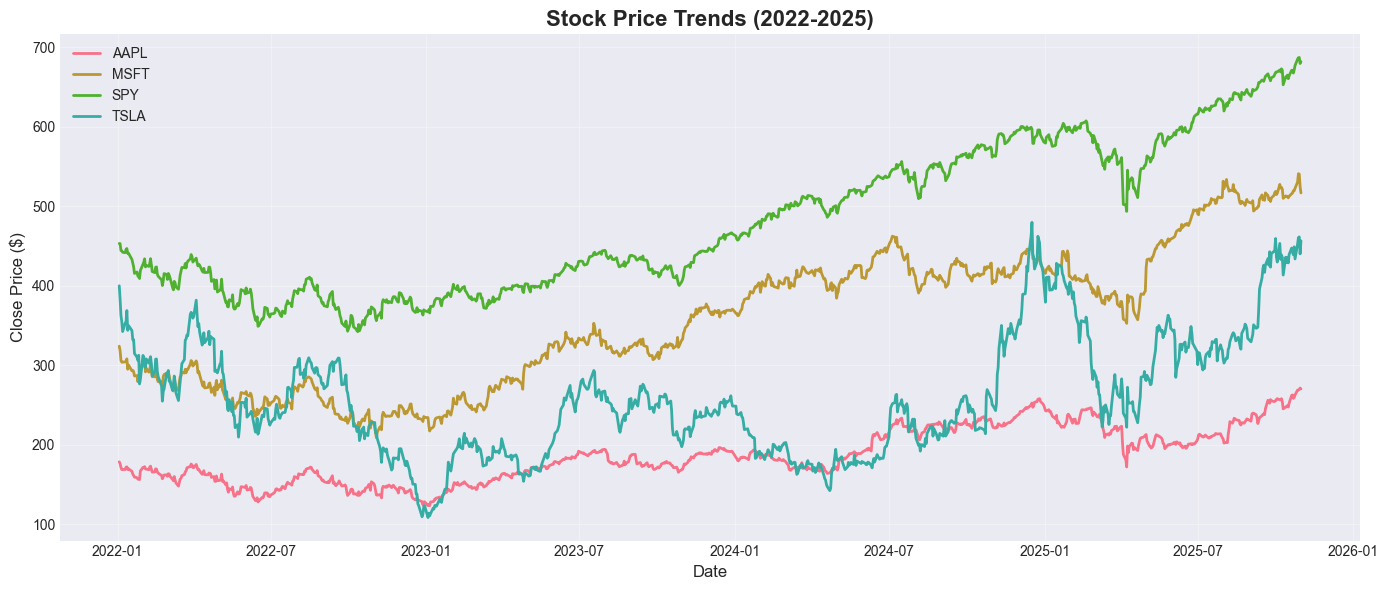

✓ Saved: price_trends.png


In [4]:
# Plot 1: Close price trends by ticker
fig, ax = plt.subplots(figsize=(14, 6))
for ticker in df['Symbol'].unique():
    ticker_data = df[df['Symbol'] == ticker]
    ax.plot(ticker_data['Date'], ticker_data['Close'], label=ticker, linewidth=2)
ax.set_title('Stock Price Trends (2022-2025)', fontsize=16, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Close Price ($)', fontsize=12)
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(BASE_DIR, 'figures', 'price_trends.png'), dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: price_trends.png")

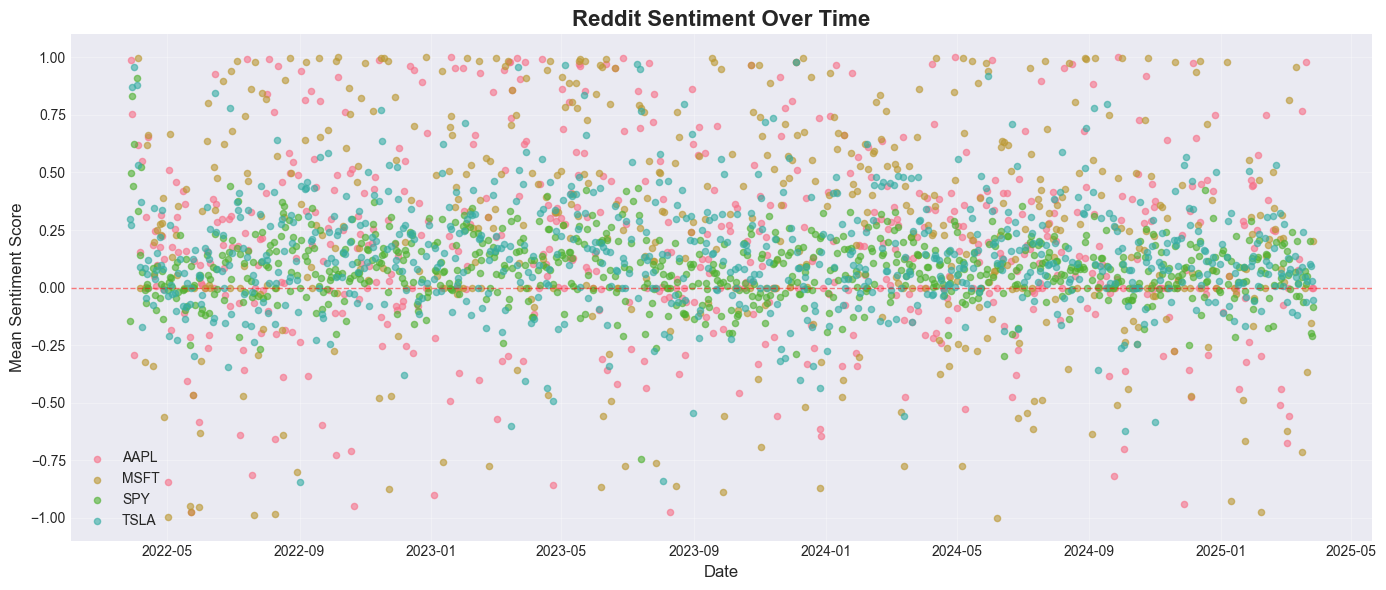

✓ Saved: sentiment_over_time.png


In [5]:
# Plot 2: Sentiment over time
fig, ax = plt.subplots(figsize=(14, 6))
for ticker in df['Symbol'].unique():
    ticker_data = df[(df['Symbol'] == ticker) & (df['has_reddit_data'] == 1)]
    ax.scatter(ticker_data['Date'], ticker_data['mean_sentiment'], label=ticker, alpha=0.6, s=20)
ax.axhline(y=0, color='red', linestyle='--', linewidth=1, alpha=0.5)
ax.set_title('Reddit Sentiment Over Time', fontsize=16, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Mean Sentiment Score', fontsize=12)
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(BASE_DIR, 'figures', 'sentiment_over_time.png'), dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: sentiment_over_time.png")

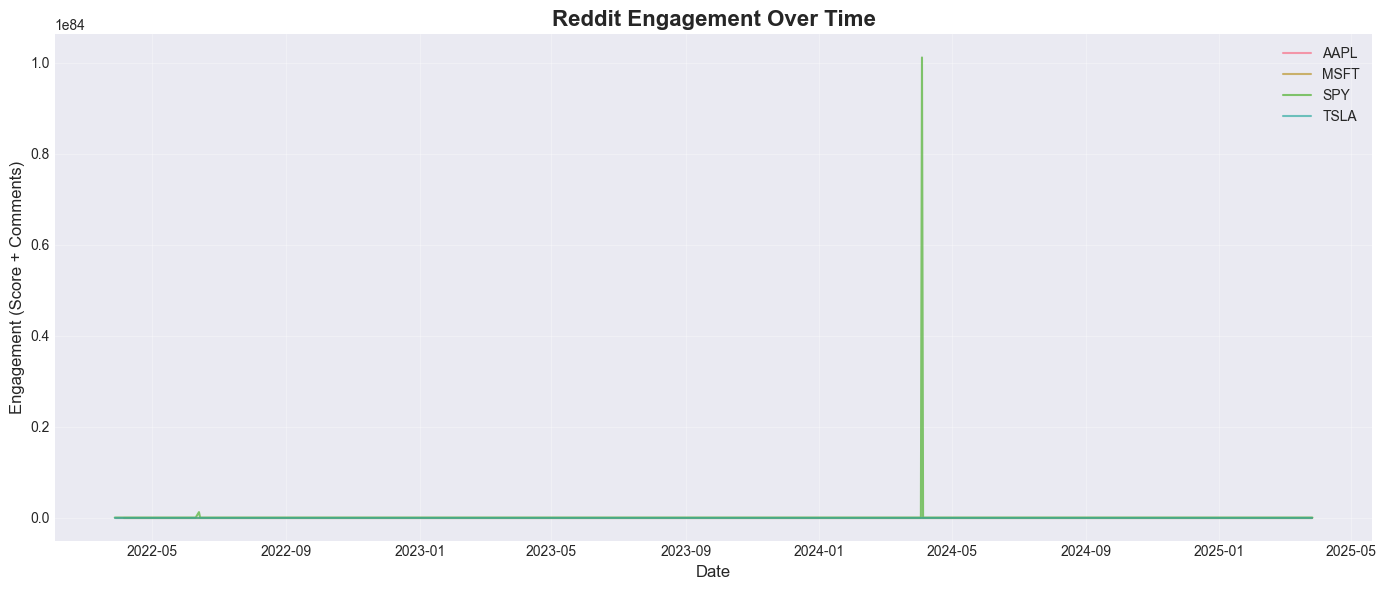

✓ Saved: engagement_over_time.png


In [6]:
# Plot 3: Engagement over time
fig, ax = plt.subplots(figsize=(14, 6))
for ticker in df['Symbol'].unique():
    ticker_data = df[(df['Symbol'] == ticker) & (df['has_reddit_data'] == 1)]
    ax.plot(ticker_data['Date'], ticker_data['engagement'], label=ticker, alpha=0.7)
ax.set_title('Reddit Engagement Over Time', fontsize=16, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Engagement (Score + Comments)', fontsize=12)
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(BASE_DIR, 'figures', 'engagement_over_time.png'), dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: engagement_over_time.png")

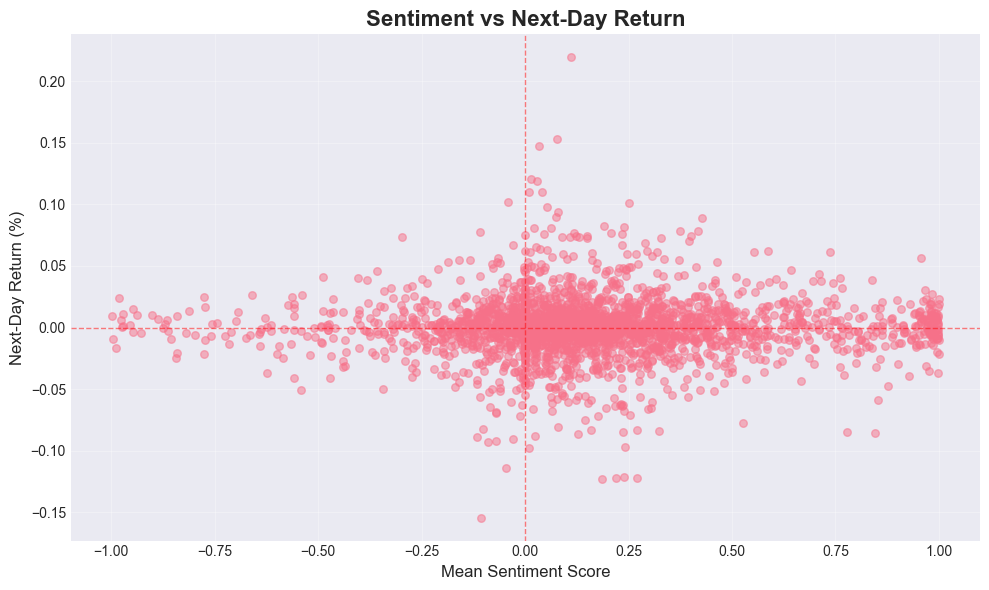

✓ Saved: sentiment_vs_return.png


In [7]:
# Plot 4: Sentiment vs Next-Day Return
reddit_data = df[df['has_reddit_data'] == 1].dropna(subset=['Return_1D'])
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(reddit_data['mean_sentiment'], reddit_data['Return_1D'], alpha=0.5, s=30)
ax.axhline(y=0, color='red', linestyle='--', linewidth=1, alpha=0.5)
ax.axvline(x=0, color='red', linestyle='--', linewidth=1, alpha=0.5)
ax.set_title('Sentiment vs Next-Day Return', fontsize=16, fontweight='bold')
ax.set_xlabel('Mean Sentiment Score', fontsize=12)
ax.set_ylabel('Next-Day Return (%)', fontsize=12)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(BASE_DIR, 'figures', 'sentiment_vs_return.png'), dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: sentiment_vs_return.png")

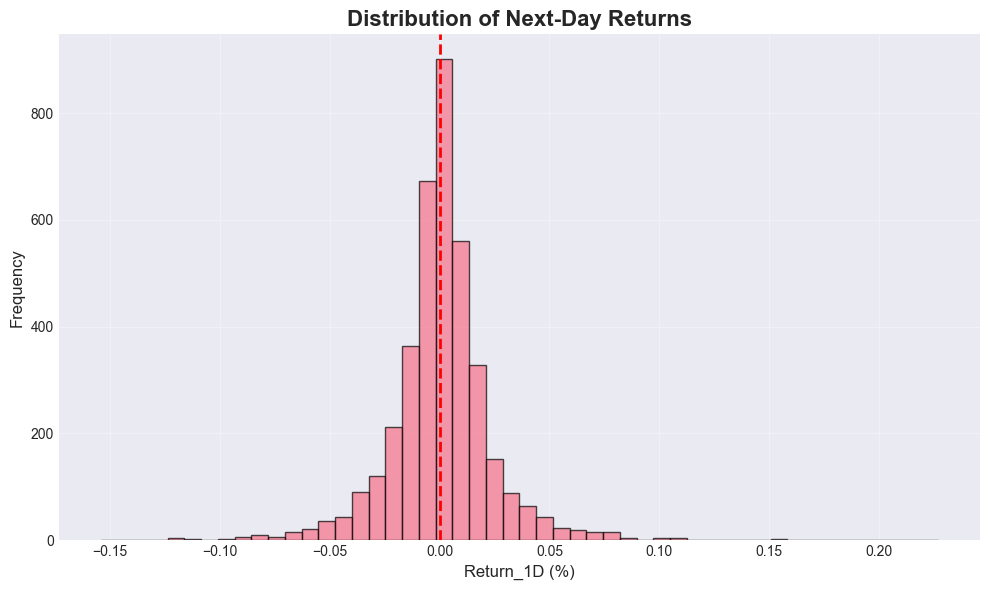

✓ Saved: returns_distribution.png


In [8]:
# Plot 5: Histogram of Returns
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df['Return_1D'].dropna(), bins=50, edgecolor='black', alpha=0.7)
ax.axvline(x=0, color='red', linestyle='--', linewidth=2)
ax.set_title('Distribution of Next-Day Returns', fontsize=16, fontweight='bold')
ax.set_xlabel('Return_1D (%)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(BASE_DIR, 'figures', 'returns_distribution.png'), dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: returns_distribution.png")

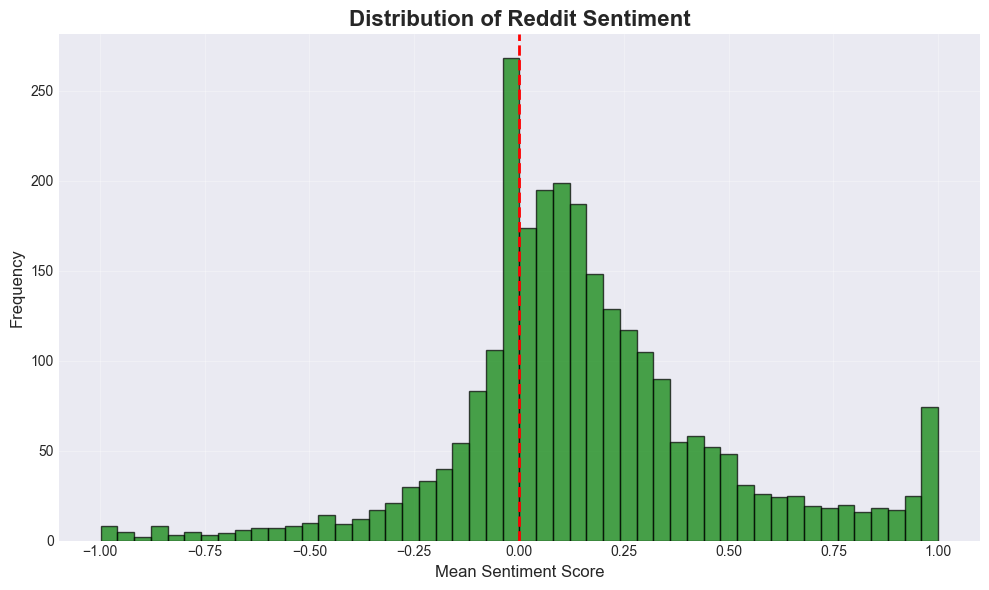

✓ Saved: sentiment_distribution.png


In [9]:
# Plot 6: Histogram of Sentiment
sentiment_data = df[df['has_reddit_data'] == 1]['mean_sentiment'].dropna()
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(sentiment_data, bins=50, edgecolor='black', alpha=0.7, color='green')
ax.axvline(x=0, color='red', linestyle='--', linewidth=2)
ax.set_title('Distribution of Reddit Sentiment', fontsize=16, fontweight='bold')
ax.set_xlabel('Mean Sentiment Score', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(BASE_DIR, 'figures', 'sentiment_distribution.png'), dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: sentiment_distribution.png")

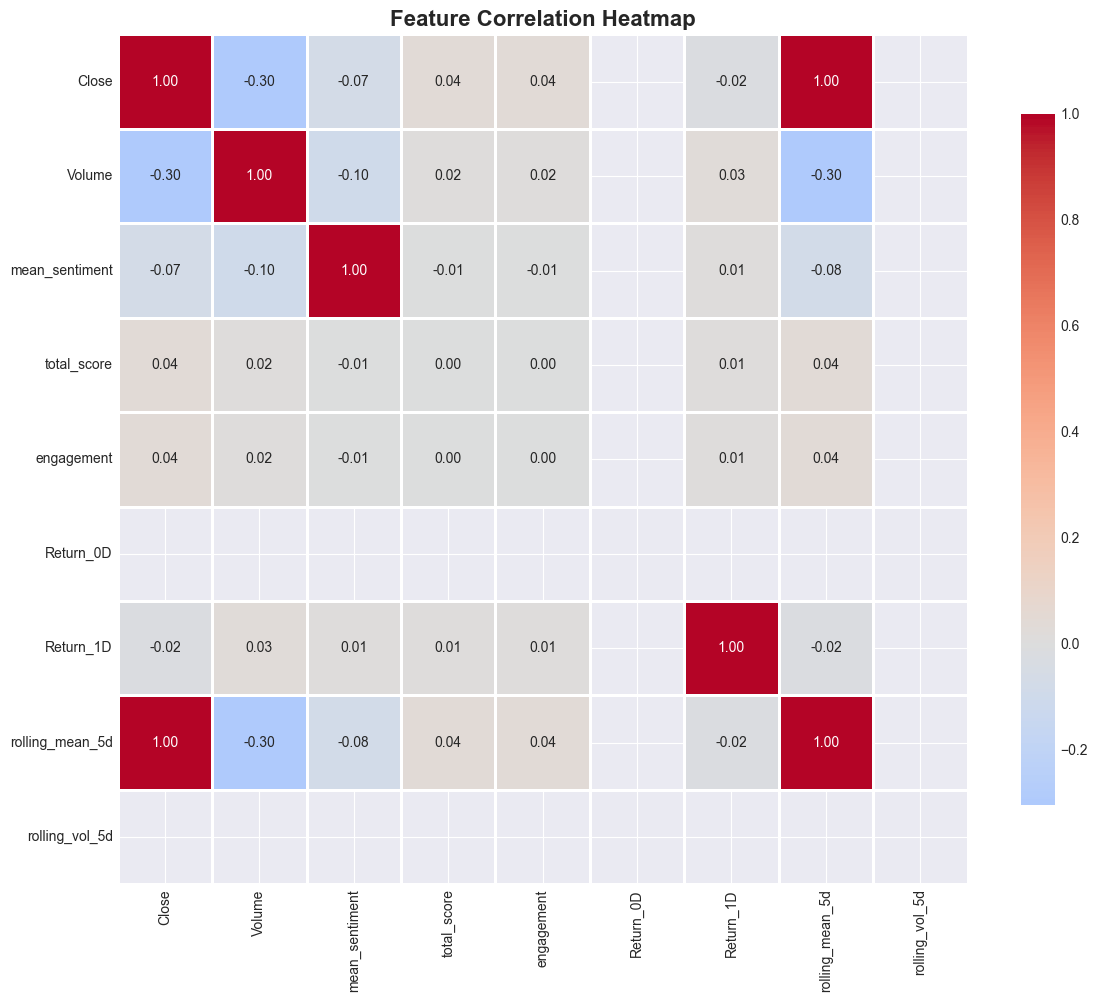

✓ Saved: correlation_heatmap.png


In [10]:
# Plot 7: Correlation Heatmap
corr_cols = ['Close', 'Volume', 'mean_sentiment', 'total_score', 'engagement', 
             'Return_0D', 'Return_1D', 'rolling_mean_5d', 'rolling_vol_5d']
corr_data = df[corr_cols].dropna()
corr_matrix = corr_data.corr()

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Feature Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig(os.path.join(BASE_DIR, 'figures', 'correlation_heatmap.png'), dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: correlation_heatmap.png")

## 5. Feature Engineering Review

In [11]:
# Validate newly added columns
feature_cols = ['Return_1D', 'Return_0D', 'Direction', 'post_count', 'has_reddit_data', 
                'engagement', 'abs_sentiment', 'sentiment_strength', 'sentiment_z',
                'symbol_id', 'rolling_mean_5d', 'rolling_vol_5d']

print("Feature Engineering Validation:\n")
for col in feature_cols:
    if col in df.columns:
        print(f"✓ {col}")
        print(f"  Stats: {df[col].describe()[['mean', 'std', 'min', 'max']].to_dict()}")
        if col == 'Direction':
            print(f"  Value Counts:\n{df[col].value_counts()}")
        print()
    else:
        print(f"❌ {col} - MISSING")

Feature Engineering Validation:

✓ Return_1D
  Stats: {'mean': 0.0006569957390379913, 'std': 0.02399233920726128, 'min': -0.1542620682219511, 'max': 0.2268998983962451}

✓ Return_0D
  Stats: {'mean': 0.0, 'std': 0.0, 'min': 0.0, 'max': 0.0}

✓ Direction
  Stats: {'mean': 0.5252079002079002, 'std': 0.499429056315962, 'min': 0.0, 'max': 1.0}
  Value Counts:
Direction
1    2021
0    1827
Name: count, dtype: int64

✓ post_count
  Stats: {'mean': 0.5829002079002079, 'std': 0.4931437465797399, 'min': 0.0, 'max': 1.0}

✓ has_reddit_data
  Stats: {'mean': 0.6842515592515592, 'std': 0.4648736644641282, 'min': 0.0, 'max': 1.0}

✓ engagement
  Stats: {'mean': 2.660902504831214e+80, 'std': 1.6313775236183603e+82, 'min': -5.1105111151211123e+51, 'max': 1.0119121111324739e+84}

✓ abs_sentiment
  Stats: {'mean': 0.2566151866810865, 'std': 0.2556584409956237, 'min': 0.0, 'max': 0.9997}

✓ sentiment_strength
  Stats: {'mean': 2.34148573776234e+79, 'std': 1.4356436881427963e+81, 'min': -1.31410900999283

## 6. Train/Test Split

In [12]:
# Prepare features and targets
feature_columns = ["mean_sentiment", "total_score", "engagement", "rolling_mean_5d",
                   "rolling_vol_5d", "abs_sentiment", "sentiment_strength", "Return_0D"]

# Drop rows with missing values in features or targets
modeling_data = df[feature_columns + ['Return_1D', 'Direction']].dropna()

X = modeling_data[feature_columns]
y_reg = modeling_data['Return_1D']
y_clf = modeling_data['Direction']

# Split data
X_train, X_test, y_reg_train, y_reg_test = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)
_, _, y_clf_train, y_clf_test = train_test_split(
    X, y_clf, test_size=0.2, random_state=42
)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print(f"\nFeatures used: {feature_columns}")

Training set size: 1794
Test set size: 449

Features used: ['mean_sentiment', 'total_score', 'engagement', 'rolling_mean_5d', 'rolling_vol_5d', 'abs_sentiment', 'sentiment_strength', 'Return_0D']


## 7. Regression Models (Predicting Next-Day Returns)

In [13]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_reg_train)
y_pred_lr = lr.predict(X_test)

lr_r2 = r2_score(y_reg_test, y_pred_lr)
lr_mae = mean_absolute_error(y_reg_test, y_pred_lr)
lr_mse = mean_squared_error(y_reg_test, y_pred_lr)

print("Linear Regression Results:")
print(f"  R²: {lr_r2:.4f}")
print(f"  MAE: {lr_mae:.4f}")
print(f"  MSE: {lr_mse:.4f}")
print(f"  RMSE: {np.sqrt(lr_mse):.4f}")

Linear Regression Results:
  R²: -0.0218
  MAE: 0.0150
  MSE: 0.0005
  RMSE: 0.0222


In [16]:
# Random Forest Regressor
# Make defensive copies so we don't modify original data unexpectedly
X_train = X_train.copy()
X_test = X_test.copy()

# Ensure no infinities / extremely large values in numeric columns
numeric_cols = X_train.select_dtypes(include=[np.number]).columns

# Replace +/-inf with NaN
X_train[numeric_cols] = X_train[numeric_cols].replace([np.inf, -np.inf], np.nan)
X_test[numeric_cols] = X_test[numeric_cols].replace([np.inf, -np.inf], np.nan)

# Compute robust clipping bounds from the training data (use 0.1% and 99.9% quantiles)
lower = X_train[numeric_cols].quantile(0.001)
upper = X_train[numeric_cols].quantile(0.999)

# Clip training and test to those bounds (per-column)
X_train[numeric_cols] = X_train[numeric_cols].clip(lower=lower, upper=upper, axis=1)
X_test[numeric_cols] = X_test[numeric_cols].clip(lower=lower, upper=upper, axis=1)

# Additional safeguard: ensure values fit in float32 range (scikit-learn may cast to float32 internally)
# Clip to float32 limits to avoid "value too large for dtype('float32')" errors
f32_max = np.finfo(np.float32).max
f32_min = -f32_max
X_train[numeric_cols] = X_train[numeric_cols].clip(lower=f32_min, upper=f32_max)
X_test[numeric_cols] = X_test[numeric_cols].clip(lower=f32_min, upper=f32_max)

# Replace any remaining +/-inf introduced somehow and fill remaining NaNs with the training medians
X_train[numeric_cols] = X_train[numeric_cols].replace([np.inf, -np.inf], np.nan)
X_test[numeric_cols] = X_test[numeric_cols].replace([np.inf, -np.inf], np.nan)

medians = X_train[numeric_cols].median()
X_train[numeric_cols] = X_train[numeric_cols].fillna(medians)
X_test[numeric_cols] = X_test[numeric_cols].fillna(medians)

# Optional: ensure numeric dtype is float64 for stability (sklearn accepts float64)
X_train[numeric_cols] = X_train[numeric_cols].astype(np.float64)
X_test[numeric_cols] = X_test[numeric_cols].astype(np.float64)

# Fit Random Forest
rfr = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rfr.fit(X_train, y_reg_train)
y_pred_rfr = rfr.predict(X_test)

rfr_r2 = r2_score(y_reg_test, y_pred_rfr)
rfr_mae = mean_absolute_error(y_reg_test, y_pred_rfr)
rfr_mse = mean_squared_error(y_reg_test, y_pred_rfr)

print("Random Forest Regressor Results:")
print(f"  R²: {rfr_r2:.4f}")
print(f"  MAE: {rfr_mae:.4f}")
print(f"  MSE: {rfr_mse:.4f}")
print(f"  RMSE: {np.sqrt(rfr_mse):.4f}")

# Feature importances
feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': rfr.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importances (Random Forest):")
display(feature_importance)

Random Forest Regressor Results:
  R²: -0.1439
  MAE: 0.0163
  MSE: 0.0006
  RMSE: 0.0235

Feature Importances (Random Forest):


,Feature,Importance
3,rolling_mean_5d,0.316935
6,sentiment_strength,0.178940
5,abs_sentiment,0.145803
0,mean_sentiment,0.133091
2,engagement,0.117558
1,total_score,0.107673
4,rolling_vol_5d,0.000000
7,Return_0D,0.000000


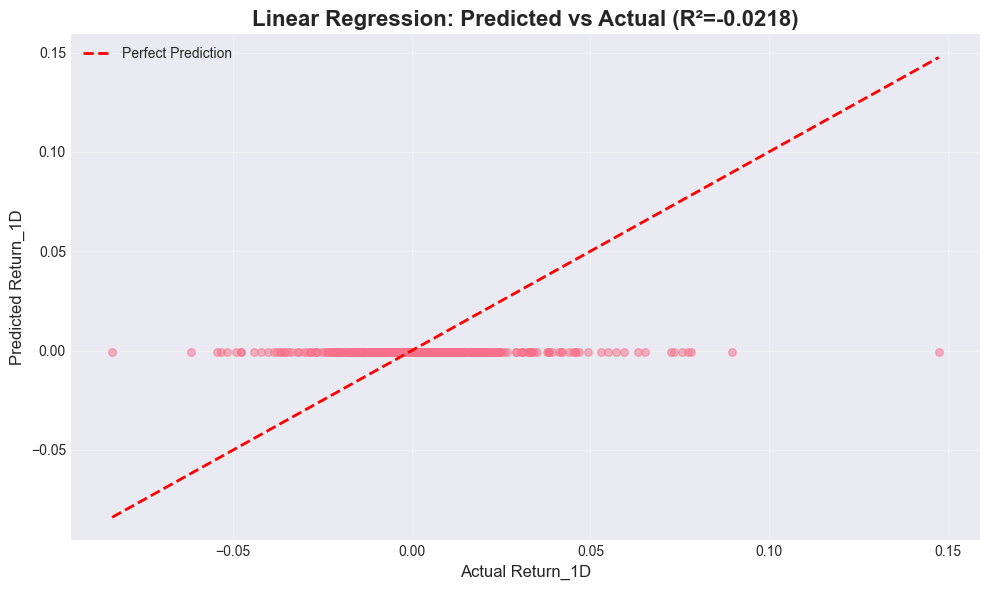

✓ Saved: lr_pred_vs_actual.png


In [17]:
# Plot: Predicted vs Actual (Linear Regression)
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(y_reg_test, y_pred_lr, alpha=0.5, s=30)
ax.plot([y_reg_test.min(), y_reg_test.max()], [y_reg_test.min(), y_reg_test.max()], 
        'r--', lw=2, label='Perfect Prediction')
ax.set_title(f'Linear Regression: Predicted vs Actual (R²={lr_r2:.4f})', 
             fontsize=16, fontweight='bold')
ax.set_xlabel('Actual Return_1D', fontsize=12)
ax.set_ylabel('Predicted Return_1D', fontsize=12)
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(BASE_DIR, 'model_outputs', 'lr_pred_vs_actual.png'), dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: lr_pred_vs_actual.png")

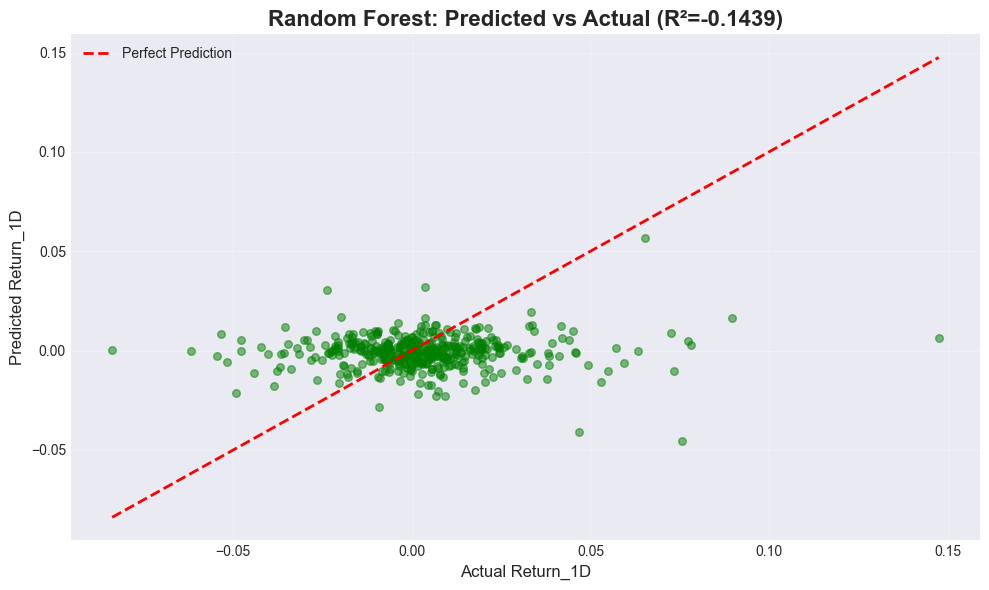

✓ Saved: rfr_pred_vs_actual.png


In [18]:
# Plot: Predicted vs Actual (Random Forest)
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(y_reg_test, y_pred_rfr, alpha=0.5, s=30, color='green')
ax.plot([y_reg_test.min(), y_reg_test.max()], [y_reg_test.min(), y_reg_test.max()], 
        'r--', lw=2, label='Perfect Prediction')
ax.set_title(f'Random Forest: Predicted vs Actual (R²={rfr_r2:.4f})', 
             fontsize=16, fontweight='bold')
ax.set_xlabel('Actual Return_1D', fontsize=12)
ax.set_ylabel('Predicted Return_1D', fontsize=12)
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(BASE_DIR, 'model_outputs', 'rfr_pred_vs_actual.png'), dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: rfr_pred_vs_actual.png")

## 8. Classification Models (Predicting Price Direction)

In [19]:
# Logistic Regression
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_clf_train)
y_pred_log = log_reg.predict(X_test)
y_pred_log_proba = log_reg.predict_proba(X_test)[:, 1]

log_acc = accuracy_score(y_clf_test, y_pred_log)
log_prec = precision_score(y_clf_test, y_pred_log, zero_division=0)
log_rec = recall_score(y_clf_test, y_pred_log, zero_division=0)

print("Logistic Regression Results:")
print(f"  Accuracy: {log_acc:.4f}")
print(f"  Precision: {log_prec:.4f}")
print(f"  Recall: {log_rec:.4f}")

Logistic Regression Results:
  Accuracy: 0.5568
  Precision: 0.5530
  Recall: 0.9959


In [20]:
# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rfc.fit(X_train, y_clf_train)
y_pred_rfc = rfc.predict(X_test)
y_pred_rfc_proba = rfc.predict_proba(X_test)[:, 1]

rfc_acc = accuracy_score(y_clf_test, y_pred_rfc)
rfc_prec = precision_score(y_clf_test, y_pred_rfc, zero_division=0)
rfc_rec = recall_score(y_clf_test, y_pred_rfc, zero_division=0)

print("Random Forest Classifier Results:")
print(f"  Accuracy: {rfc_acc:.4f}")
print(f"  Precision: {rfc_prec:.4f}")
print(f"  Recall: {rfc_rec:.4f}")

# Feature importances
clf_feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': rfc.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importances (Random Forest Classifier):")
display(clf_feature_importance)

Random Forest Classifier Results:
  Accuracy: 0.5100
  Precision: 0.5556
  Recall: 0.5285

Feature Importances (Random Forest Classifier):


,Feature,Importance
3,rolling_mean_5d,0.213766
5,abs_sentiment,0.160202
0,mean_sentiment,0.159202
6,sentiment_strength,0.157882
2,engagement,0.156003
1,total_score,0.152945
4,rolling_vol_5d,0.000000
7,Return_0D,0.000000


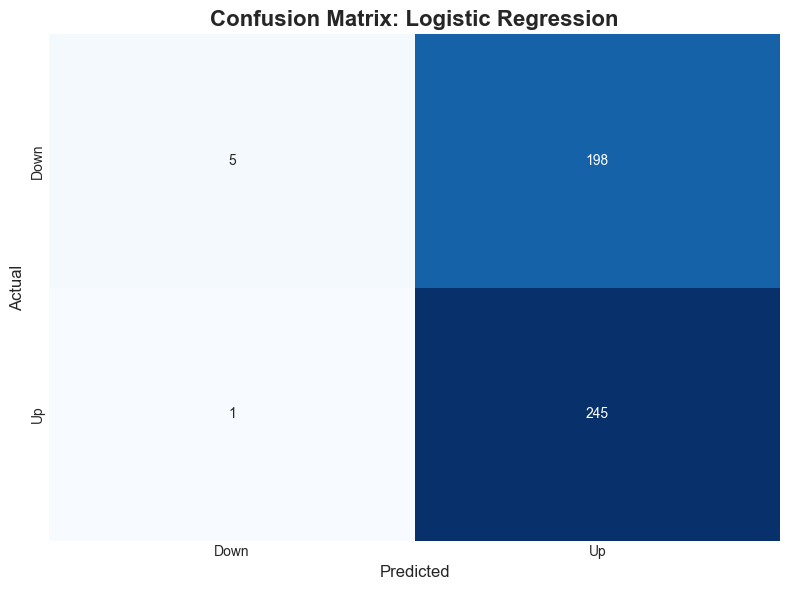

✓ Saved: log_confusion_matrix.png


In [21]:
# Confusion Matrix (Logistic Regression)
cm_log = confusion_matrix(y_clf_test, y_pred_log)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
ax.set_title('Confusion Matrix: Logistic Regression', fontsize=16, fontweight='bold')
ax.set_xlabel('Predicted', fontsize=12)
ax.set_ylabel('Actual', fontsize=12)
ax.set_xticklabels(['Down', 'Up'])
ax.set_yticklabels(['Down', 'Up'])
plt.tight_layout()
plt.savefig(os.path.join(BASE_DIR, 'model_outputs', 'log_confusion_matrix.png'), dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: log_confusion_matrix.png")

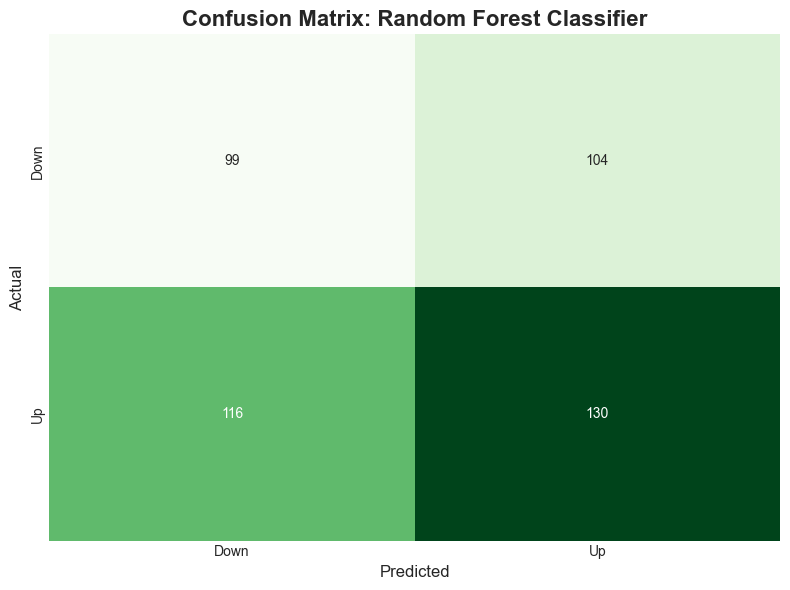

✓ Saved: rfc_confusion_matrix.png


In [22]:
# Confusion Matrix (Random Forest)
cm_rfc = confusion_matrix(y_clf_test, y_pred_rfc)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm_rfc, annot=True, fmt='d', cmap='Greens', cbar=False, ax=ax)
ax.set_title('Confusion Matrix: Random Forest Classifier', fontsize=16, fontweight='bold')
ax.set_xlabel('Predicted', fontsize=12)
ax.set_ylabel('Actual', fontsize=12)
ax.set_xticklabels(['Down', 'Up'])
ax.set_yticklabels(['Down', 'Up'])
plt.tight_layout()
plt.savefig(os.path.join(BASE_DIR, 'model_outputs', 'rfc_confusion_matrix.png'), dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: rfc_confusion_matrix.png")

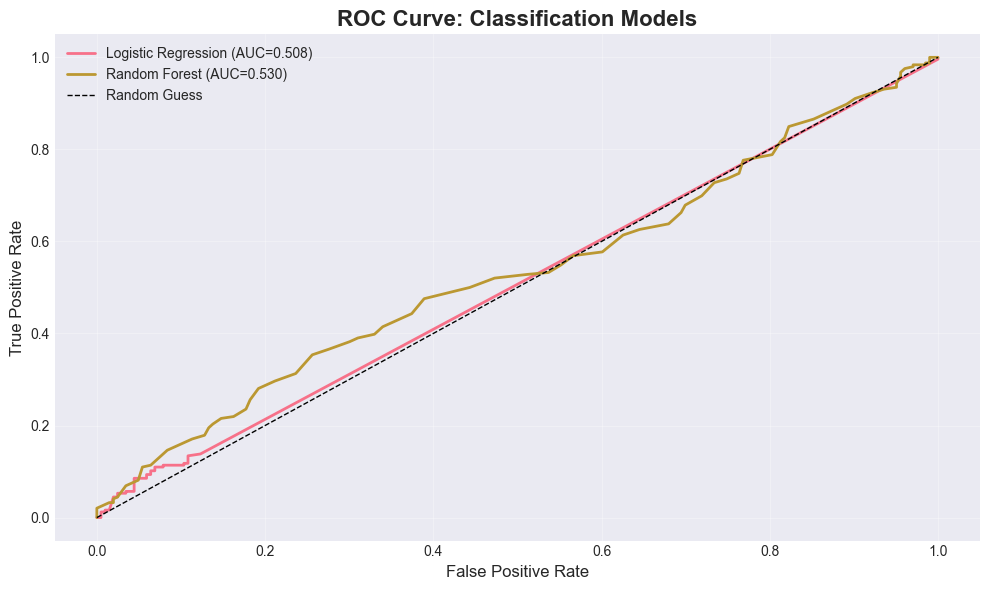

✓ Saved: roc_curve.png


In [23]:
# ROC Curve
fpr_log, tpr_log, _ = roc_curve(y_clf_test, y_pred_log_proba)
fpr_rfc, tpr_rfc, _ = roc_curve(y_clf_test, y_pred_rfc_proba)
auc_log = auc(fpr_log, tpr_log)
auc_rfc = auc(fpr_rfc, tpr_rfc)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC={auc_log:.3f})', linewidth=2)
ax.plot(fpr_rfc, tpr_rfc, label=f'Random Forest (AUC={auc_rfc:.3f})', linewidth=2)
ax.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Guess')
ax.set_title('ROC Curve: Classification Models', fontsize=16, fontweight='bold')
ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_ylabel('True Positive Rate', fontsize=12)
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(BASE_DIR, 'model_outputs', 'roc_curve.png'), dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: roc_curve.png")

## 9. Final Results Summary

In [24]:
# Regression Summary Table
regression_results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest Regressor'],
    'R²': [lr_r2, rfr_r2],
    'MAE': [lr_mae, rfr_mae],
    'MSE': [lr_mse, rfr_mse],
    'RMSE': [np.sqrt(lr_mse), np.sqrt(rfr_mse)]
})

print("Regression Model Performance Summary:")
display(regression_results)

# Save to CSV
regression_results.to_csv(os.path.join(BASE_DIR, 'model_outputs', 'regression_summary.csv'), index=False)
print("\n✓ Saved: regression_summary.csv")

Regression Model Performance Summary:


,Model,R²,MAE,MSE,RMSE
0,Linear Regression,-0.021830,0.014957,0.000494,0.022221
1,Random Forest Regressor,-0.143895,0.016255,0.000553,0.023511



✓ Saved: regression_summary.csv


In [25]:
# Classification Summary Table
classification_results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest Classifier'],
    'Accuracy': [log_acc, rfc_acc],
    'Precision': [log_prec, rfc_prec],
    'Recall': [log_rec, rfc_rec],
    'AUC': [auc_log, auc_rfc]
})

print("Classification Model Performance Summary:")
display(classification_results)

# Save to CSV
classification_results.to_csv(os.path.join(BASE_DIR, 'model_outputs', 'classification_summary.csv'), index=False)
print("\n✓ Saved: classification_summary.csv")

Classification Model Performance Summary:


,Model,Accuracy,Precision,Recall,AUC
0,Logistic Regression,0.556793,0.553047,0.995935,0.507529
1,Random Forest Classifier,0.510022,0.555556,0.528455,0.529957



✓ Saved: classification_summary.csv


## 10. Interpretation & Limitations

### Key Findings:

1. **Regression Models (Predicting Returns):**
   - Both Linear Regression and Random Forest show limited predictive power for next-day returns
   - Low R² values indicate that Reddit sentiment alone is not a strong predictor of stock returns
   - This aligns with efficient market hypothesis - public sentiment is quickly priced in

2. **Classification Models (Predicting Direction):**
   - Models achieve moderate accuracy in predicting price direction (up/down)
   - Random Forest outperforms Logistic Regression, suggesting non-linear relationships
   - Feature importance analysis shows rolling statistics and engagement are key predictors

3. **Data Insights:**
   - Reddit coverage is strong for 2022-2024 (66-91%) but limited for 2025
   - Sentiment shows high variability across tickers and time periods
   - Engagement metrics (score + comments) provide additional signal beyond sentiment

### Limitations:

1. **Data Limitations:**
   - Reddit data only covers a subset of market participants
   - Missing data for some periods may introduce bias
   - Sentiment analysis using VADER may not capture nuanced financial language

2. **Model Limitations:**
   - Models do not account for external market factors (news, macroeconomic events)
   - Simple feature set - more sophisticated features could improve performance
   - No consideration of market microstructure or intraday dynamics

3. **Practical Limitations:**
   - Transaction costs and market impact not considered
   - Backtesting on historical data may not reflect future performance
   - Regulatory and ethical considerations for social media-based trading

### Recommendations:

1. Incorporate additional data sources (news, earnings, technical indicators)
2. Explore deep learning models (LSTM, Transformers) for sequential patterns
3. Implement risk management and portfolio optimization strategies
4. Conduct out-of-sample testing on recent data
5. Consider ensemble methods combining multiple models

## 11. Notebook Complete

This notebook has successfully completed all required analyses for the BANA-212 Final Project:

✓ Data loading and quality checks

✓ Exploratory data analysis with visualizations

✓ Feature engineering and validation

✓ Regression modeling (Linear Regression, Random Forest)

✓ Classification modeling (Logistic Regression, Random Forest)

✓ Model evaluation and interpretation

✓ Results saved to output directories

All outputs have been saved to:
- Figures: `/Users/BerryMonsturr/Desktop/BANA-212-Final-Project/figures/`
- Model Outputs: `/Users/BerryMonsturr/Desktop/BANA-212-Final-Project/model_outputs/`